# Basic plotting with pandas and Matplotlib


As we're now familiar with some of the features of [pandas](https://pandas.pydata.org/), we will wade into visualizing our data in Python using the built-in plotting options available directly in pandas. Much like the case of pandas being built upon [NumPy](https://numpy.org/), plotting in pandas takes advantage of plotting features from the [Matplotlib](https://matplotlib.org/) plotting library. Plotting in pandas provides a basic framework for visualizing our data, but as you'll see we will sometimes need to also use features from Matplotlib to enhance our plots. In particular, we will use features from the the `pyplot` module in Matplotlib, which provides [MATLAB](https://www.mathworks.com/products/matlab.html)-like plotting.

Toward the end of the lesson we will also briefly explore creating interactive plots using the [hvPlot](https://hvplot.holoviz.org/) plotting API, which allows us to produce plots similar to those available in the [Bokeh plotting library](https://docs.bokeh.org/en/latest/index.html) using plotting syntax similar to that used normally in pandas.

## Input data

In the lesson this week we are using a subset of the weather observation data from Finland used in Lesson 6, which was downloaded from the [NOAA online databases](https://www.ncei.noaa.gov/cdo-web/). In this case we'll focus on weather observation station data from the Helsinki-Vantaa airport.

In case you are working with Jupyter Lab installed on your own computer, Lesson 6 covered [how to download the weather data](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html#downloading-the-data). **Those using the CSC Notebooks do not need to download the data**.

## About the data

As part of the download there are a number of files that describe the weather data. These *metadata* files include:

- A list of stations: [6367598020644stn.txt](data/fin_wx/6367598020644stn.txt)
- Details about weather observations at each station: [6367598020644inv.txt](data/fin_wx/6367598020644inv.txt)
- A data description (i.e., column names): [3505doc.txt](data/fin_wx/3505doc.txt)

The input data for this week are separated with varying number of spaces (i.e., fixed width). The first lines and columns of the data look like following:

``` 
  USAF  WBAN YR--MODAHRMN DIR SPD GUS CLG SKC L M H  VSB MW MW MW MW AW AW AW AW W TEMP DEWP    SLP   ALT    STP MAX MIN PCP01 PCP06 PCP24 PCPXX SD
029740 99999 195201010000 200  23 ***  15 OVC 7 2 *  5.0 63 ** ** ** ** ** ** ** 6   36   32  989.2 ***** ****** *** *** ***** ***** ***** ***** **
029740 99999 195201010600 220  18 ***   8 OVC 7 2 *  2.2 63 ** ** ** ** ** ** ** 6   37   37  985.9 ***** ****** ***  34 ***** ***** ***** ***** **
029740 99999 195201011200 220  21 ***   5 OVC 7 * *  3.8 59 ** ** ** ** ** ** ** 5   39   36  988.1 ***** ****** *** *** ***** ***** ***** ***** **
029740 99999 195201011800 250  16 *** 722 CLR 0 0 0 12.5 02 ** ** ** ** ** ** ** 5   36   27  991.9 ***** ******  39 *** ***** ***** ***** ***** **
```

## Getting started

Let's start by importing Pandas and reading our data file.

In [1]:
import pandas as pd

#### Datetime in Python
For the lesson this week we will be using a datetime index for our weather observations.
We did not cover the datetime data type in detail in Lesson 6, but you can find [a brief introduction to datetime in the Lesson 6 materials](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html#datetime-optional-for-lesson-6).

Just as we did last week, we'll read our data file by passing a few parameters to the Pandas `read_csv()` function. In this case, however, we'll include a few additional parameters in order to read the data with a *datetime index*. Let's read the data first, then see what happened.

In [4]:
# IGNORE THIS CELL
# It is only needed to generate the course website
fp = r"C:\Users\alexg\OneDrive\Desktop\Finland-weather-data-full\data\029740.txt"

In [5]:
data = pd.read_csv(
    fp,
    delim_whitespace=True,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["YR--MODAHRMN", "TEMP", "MAX", "MIN"],
    parse_dates=["YR--MODAHRMN"],
    index_col="YR--MODAHRMN",
)

C:\Users\alexg\AppData\Local\Temp\ipykernel_7004\4042178882.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


So what's different here? Well, we have added two new parameters: `parse_dates` and `index_col`.

- `parse_dates` takes a Python list of column name(s) containing date data that Pandas will parse and convert to the *datetime* data type. For many common date formats this parameter will automatically recognize and convert the date data.
- `index_col` is used to state a column that should be used to index the data in the DataFrame. In this case, we end up with our date data as the DataFrame index. This is a very useful feature in Pandas as we'll see below.

Having read in the data, let's have a quick look at what we have using `data.head()`.

In [6]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


As mentioned above, you can now see that the index column for our DataFrame (the first column) contains date values related to each row in the DataFrame.

## Basic x-y plot

Now we're ready for our first plot. We can start by using the basic line plot in Pandas to look at our temperature data.

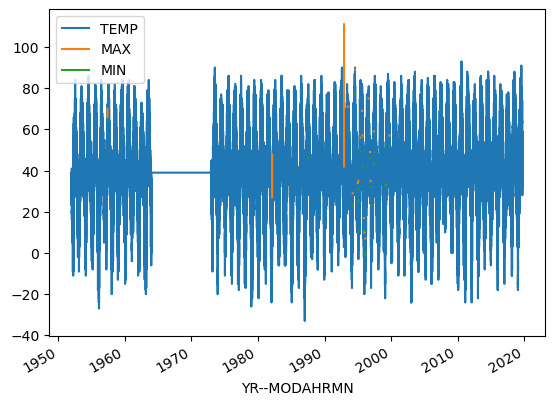

In [7]:
ax = data.plot()

If all goes well, you should see the plot above.

OK, so what happened here?

1. We first created the plot object using the `plot()` method of the `data` DataFrame. Without any parameters given, this makes the plot of all columns in the DataFrame as lines of different color on the y-axis with the index, time in this case, on the x-axis.
2. In case we want to be able to modify the plot or add anything, we assign the plot object to the variable `ax`. We can check its type below.

In fact, let's check the type of the `ax` variable now.

In [8]:
type(ax)

matplotlib.axes._axes.Axes

OK, so it looks like we have some kind of plot data type that is part of Matplotlib. Clearly, pandas is using Matplotlib for generating our plots.

### Selecting our plotted data

Now, let's make a few small changes to our plot and plot the data again. First, let's only plot the observed temperatures in the `data['TEMP']` column, and let's restrict ourselves to observations from the afternoon of October 1, 2019 (the last day in our dataset). We can do this by selecting the desired data column and date range first, then plotting our selection.

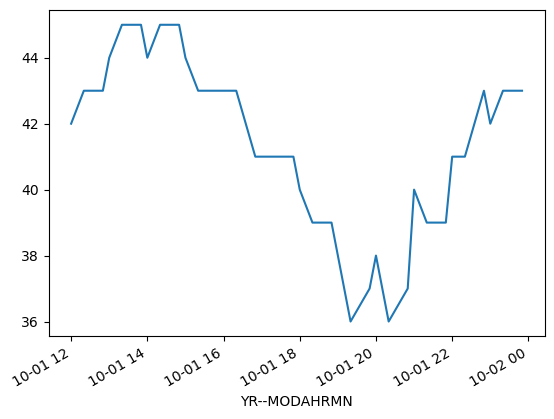

In [9]:
oct1_temps = data["TEMP"].loc[data.index >= "201910011200"]
ax = oct1_temps.plot()

So, what did we change?

1. Well, we selected only the `'TEMP'` column now by using `data['TEMP']` instead of `data`.
2. We've added a restriction to the date range using `loc[]` to select only rows where the index value `data.index` is greater than `'201910011200'`. In that case, the number in the string is in the format `'YYYYMMDDHHMM'`, where `YYYY` is the year, `MM` is the month, `DD` is the day, `HH` is the hour, and `MM` is the minute. Now we have all observations from noon onward on October 1, 2019.
3. By saving this selection to the DataFrame `oct1_temps` we're able to now use `oct1_temps.plot()` to plot only our selection. This is cool, but we can do even better...

## Basic plot formatting

We can make our plot look a bit nicer and provide more information by using a few additional plotting options to pandas/Matplotlib.

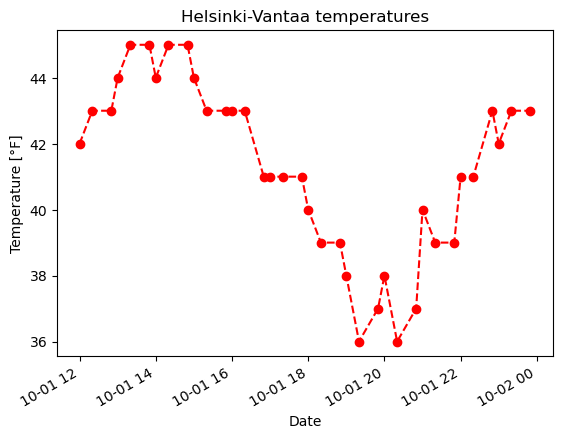

In [10]:
# Change line and symbol format, and add axis labels/title
ax = oct1_temps.plot(
    style="ro--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
)

Now we see our temperature data as a red dashed line with circles showing the data points.
This comes from the additional `style='ro--'` used with `oct1_temps.plot()`.
In this case, `r` tells the `oct1_temps.plot()` function to use red color for the lines and symbols, `o` tells it to show circles at the points, and `--` says to use a dashed line.
You can use `help(oct1_temps.plot)` to find out more about formatting plots or have a look at the [documentation on the pandas website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html#pandas.DataFrame.plot.line).
We have also added a title using the `title` parameter, and axis labels using the `xlabel` and `ylabel` parameters.

In [11]:
# help(oct1_temps.plot)

### Embiggening\* the plot

While the plot sizes we're working with are OK, it would be nice to have them displayed a bit larger.
Fortunately, there is an easy way to make the plots larger in pandas/Matplotlib.
We can simply add the `figsize` parameter with the desired figure size listed as a tuple (a set of values in normal parentheses) that lists the width and height of the figure (in inches!).

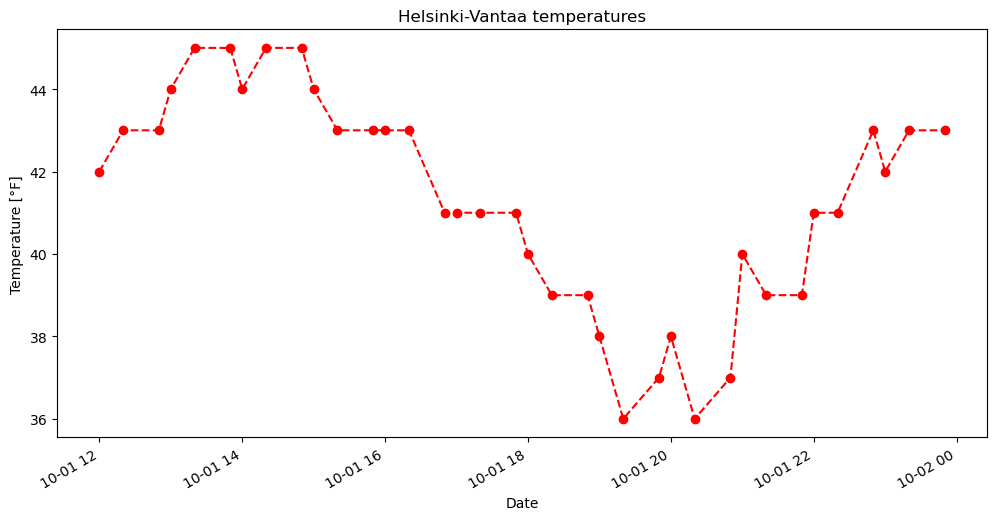

In [12]:
# Adjust the figure size
ax = oct1_temps.plot(
    style="ro--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
)

The cell above sets the default plot size to be 12 inches wide by 6 inches tall.
Feel free to change these values if you prefer.

#### note
It is also possible to change the default figure size for all figures in a Jupyter Notebook by importing the pyplot module from matplotlib (i.e., `import matplotlib.pyplot as plt`)and then defining the default figure size using `plt.rcParams['figure.figsize'] = [12, 6]`. In this case the figure size should be given as a Python list.

\* To [embiggen](https://www.dictionary.com/browse/embiggen) means to enlarge.
It's a perfectly [cromulent](https://www.dictionary.com/browse/cromulent) word.

### Other common plot formatting operations

#### Adding text to the plot

Adding text to plots can be done using `ax.text()`.

```python
ax.text(x, y, 'Text to display')
```

This would display "Text to display" at the location *x*, *y* on the plot.
We'll see how to do this in a live example in just a second.

#### Changing the axis ranges

Changing the plot axes can be done using the `xlim` and `ylim` parameters of the `plot()` function

```python
df.plot(xlim=[xmin, xmax], ylim=[ymin, ymax])
```

where `xmin` should be the minimum bound of the x-axis, `xmax` should be the maximum bound, and the same goes for the y-axis with `ymin` and `ymax`.

#### Dealing with datetime axes

One issue we will encounter with both placing text on the plot and changing the axis ranges is our datetime index for our DataFrame. In order to do either thing, we need to define x-values using a datetime object. The easiest way to do this is to use the Pandas `pd.to_datetime()` function, which converts a character string date to a datetime object. For example, we can convert 13:00 on October 1, 2019 from the character string `'201910011300'` to a datetime equivalent by typing

In [13]:
pd.to_datetime("201910011300")

Timestamp('2019-10-01 13:00:00')

With this datetime issue in mind, let's now consider a modified version of the plot above, we can

1. Limit our time range to 12:00 to 15:00 on October 1, 2019
2. Only look at temperatures between 40-46° Fahrenheit
3. Add text to note the coldest part of the early afternoon.

Text(2019-10-01 12:05:00, 42.0, '<- Coldest temperature in early afternoon')

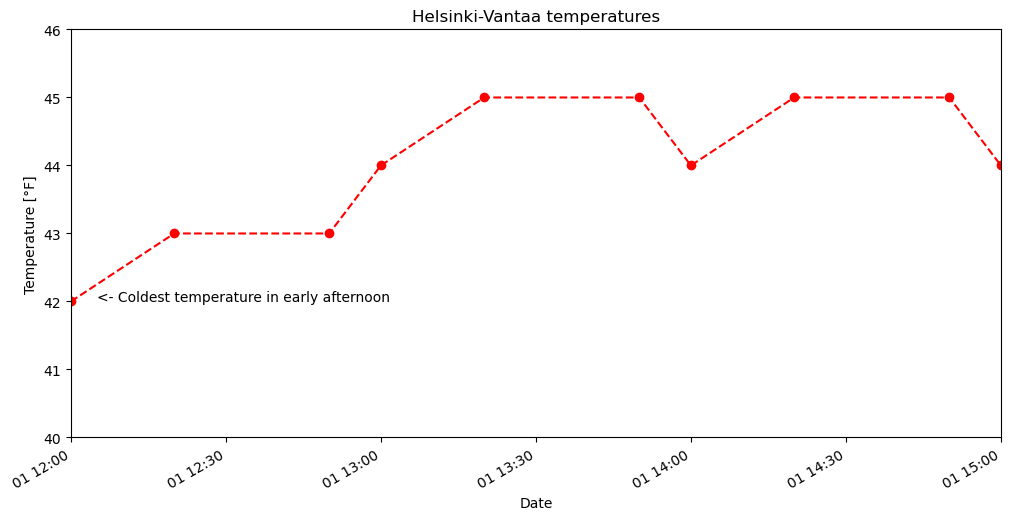

In [14]:
# Define the start, end, and cold times
start_time = pd.to_datetime("201910011200")
end_time = pd.to_datetime("201910011500")
cold_time = pd.to_datetime("201910011205")

# Create the plot, including the axis limits
ax = oct1_temps.plot(
    style="ro--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[40.0, 46.0],
)

# Add text to display the coldest temperature
ax.text(cold_time, 42.0, "<- Coldest temperature in early afternoon")

### Check your understanding

Create a line plot similar to our examples above with the following attributes:
    
- Temperature data from 18:00-24:00 on October 1, 2019
- A dotted black line connecting the observations (do not show the data points)
- A title that reads "Evening temperatures on October 1, Helsinki-Vantaa"
- A text label indicating the warmest temperature in the evening

Text(2019-10-01 21:20:00, 43.0, 'Warmest time of the evening ->')

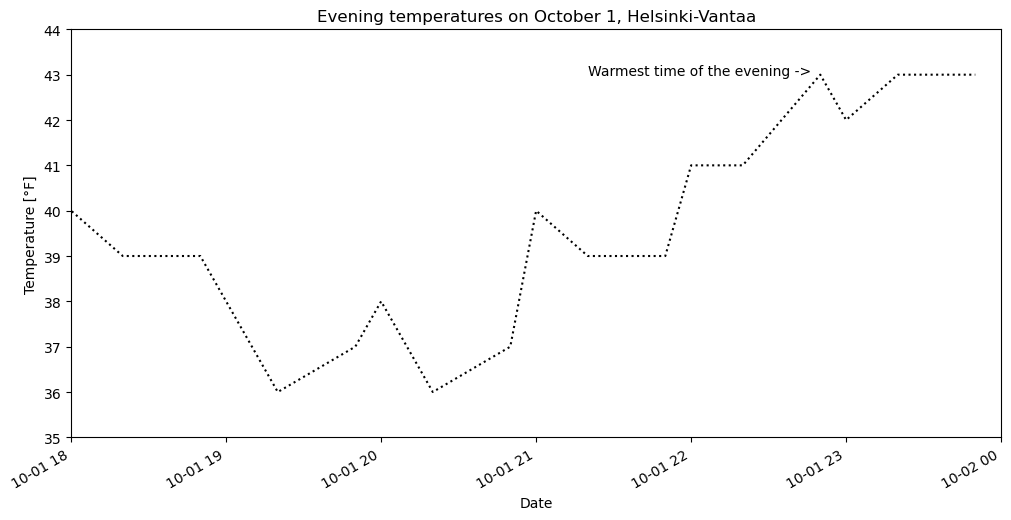

In [15]:
# Solution
# Define start, end, and cold times
start_time = pd.to_datetime("201910011800")
end_time = pd.to_datetime("201910020000")
warm_time = pd.to_datetime("201910012120")

# Create the plot, including the axis limits

ax = oct1_temps.plot(
    style="k:",
    title="Evening temperatures on October 1, Helsinki-Vantaa",
    xlabel="Date",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[35.0, 44.0],
)

# Display text on plot
ax.text(warm_time, 43.0, "Warmest time of the evening ->")

## Bar plots in pandas

In addition to line plots, there are many other options for plotting in pandas. Bar plots are one option, which can be used quite similarly to line plots with the addition of the `kind=bar` parameter. Note that it is easiest to plot our selected time range for a bar plot by selecting the dates in our data series first, rather than adjusting the plot limits. pandas sees bar plot data as categorical, so the date range is more difficult to define for x-axis limits. For the y-axis, we can still define its range using the `ylim=[ymin, ymax]` parameter. Similarly, text placement on a bar plot is more difficult, and most easily done using the index value of the bar where the text should be placed.

Text(0, 42.1, 'Coldest \ntemp \nv')

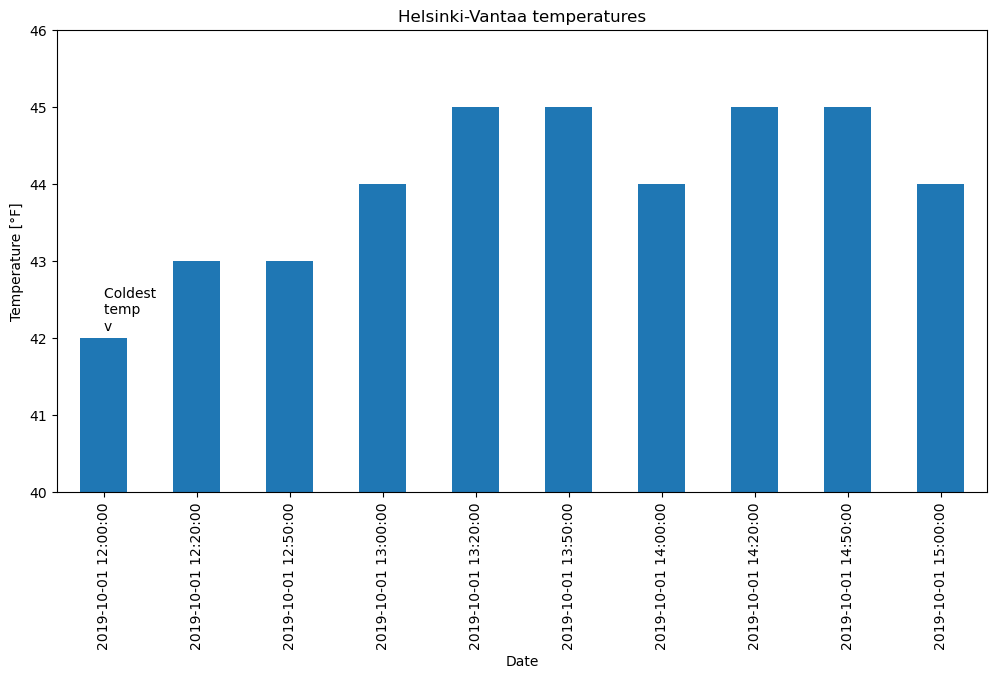

In [16]:
# Define time range
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= "201910011500"]

# Create bar plot
ax = oct1_afternoon.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
    ylim=[40, 46],
)

# Add plot text
ax.text(0, 42.1, "Coldest \ntemp \nv")

You can find more about how to format bar charts on the [pandas documentation website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

## Saving your plots as image files

Saving plots created using pandas can be done in several ways. The recommendation for use outside of Jupyter notebooks is to use Matplotlib's `plt.savefig()` function. When using `plt.savefig()`, you simply give a list of commands to generate a plot and include `plt.savefig()` with some parameters as the last command in the Python cell. The file name is required, and the image format will be determined based on the listed file extension. Note that because we have not used Matplotlib for any of the earlier plots, we need to import it here first.

Matplotlib plots can be saved in a number of useful file formats, including PNG, PDF, and EPS. PNG is a nice format for raster images, and EPS is probably easiest to use for vector graphics. Let's check out an example and save our lovely bar plot.

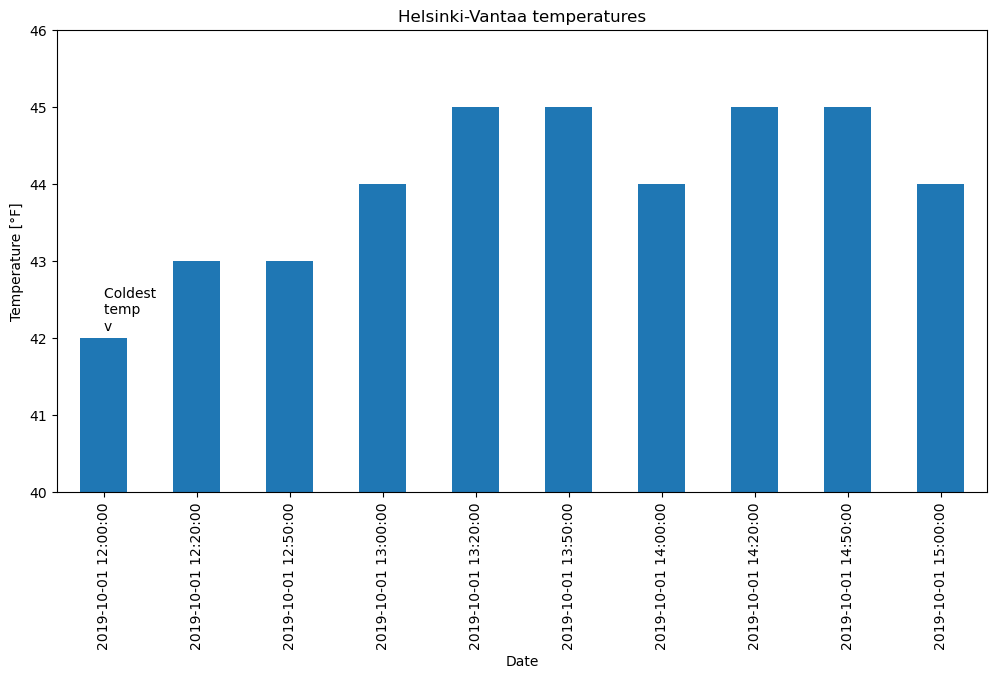

In [17]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create bar plot
ax = oct1_afternoon.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
    ylim=[40, 46],
)

# Add plot text
ax.text(0, 42.1, "Coldest \ntemp \nv")

# Save plot to file
plt.savefig("bar-plot.png")

If you refresh your **Files** tab on the left side of the JupyterLab window you should now see `bar-plot.png` listed.
We could try to save another version in higher resolution with a minor change to our plot commands above.

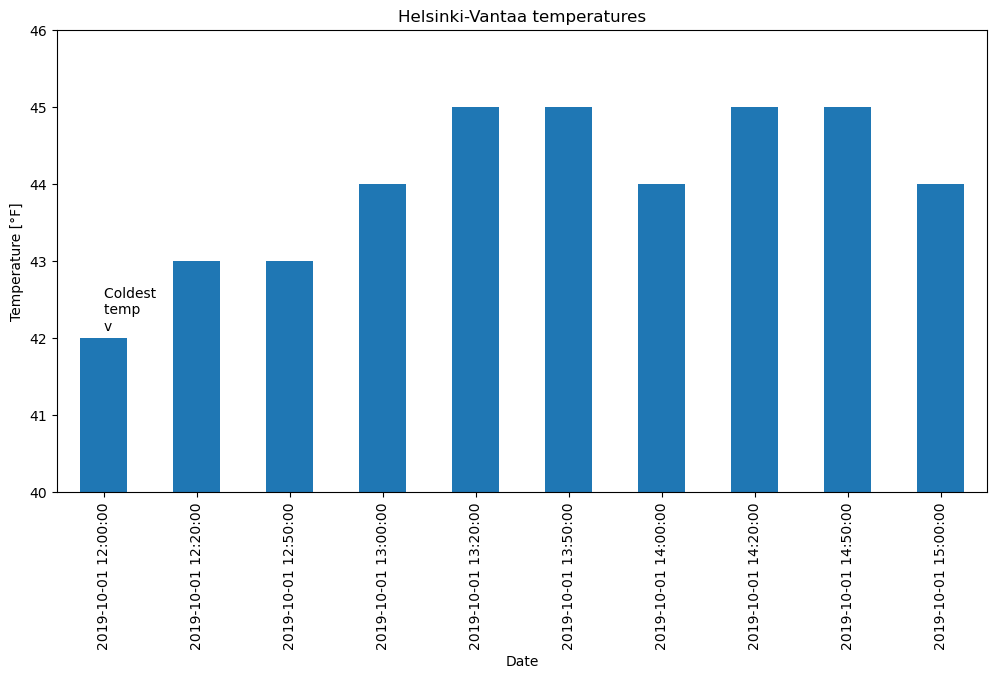

In [18]:
# Create bar plot
ax = oct1_afternoon.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
    ylim=[40, 46],
)

# Add plot text
ax.text(0, 42.1, "Coldest \ntemp \nv")

# Save plot to file (high resolution, PDF)
plt.savefig("bar-plot-hi-res.pdf", dpi=600)

## Interactive plotting, a teaser (optional)

One of the cool things in Jupyter notebooks is that our plots need not be static. We can easily create plots that are interactive, allowing us to view data values by mousing over them, or to click to enable/disable plotting of some data. There are libraries we could use to do this, but we'll use the [hvPlot plotting API](https://hvplot.holoviz.org/), which allows us to create interactive plots with little additional effort.

[hvPlot](https://hvplot.holoviz.org/) is a high-level plotting package that can accept several different common Python data types and plot them using using the [bokeh visualization library](http://bokeh.org/). The great thing with hvPlot is that it takes almost no effort to move from plotting in pandas to creating interactive plots.

To get started, we need to import the pandas submodule of hvPlot.

In [19]:
import hvplot.pandas

ModuleNotFoundError: No module named 'hvplot'

With the submodule imported, we can simply take a slice of data from the `data` DataFrame, the month of July in 2014 in this case, and create a plot just as we would in pandas. The only difference here is that we will use the hvplot() method rather than the plot() method from pandas.

Unfortunately we still haven't installed [hvplot](https://hvplot.holoviz.org/) yet. Recall how to [install modules](03c_modules.ipynb).

install hvplot by opening anaconda prompt, activating your environment, and then typing conda install -c pyvis hvplot

```(base) C:\Users\BA>conda activate meteo231```  
```(meteo231) C:\Users\BA>conda install -c pyviz hvplot```

(pray it works)

In [20]:
july2014_df = data.loc[(data.index >= "201407010000") & (data.index < "201407310000")]

july2014_df.hvplot(
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    ylim=[45.0, 90.0],
)

AttributeError: 'DataFrame' object has no attribute 'hvplot'

Now we have an interactive line plot where you can place their mouse cursor above the line to see the plotted values at a given location, zoom in and/or pan the plot to areas of interest, and click on the legend items to hide or display them. And as you can see, hvPlot makes it very easy to start creating your own interactive plots from pandas DataFrames.

That is all we will explore for the moment, but you are welcome to have a look at the [hvPlot User Guide](https://hvplot.holoviz.org/user_guide/index.html) to learn more about the types of visualizations available in hvPlot and how to use them.